In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/olympic-swimming-1912-to-2020/Olympic_Swimming_Results_1912to2020.csv


In [2]:
df = pd.read_csv('/kaggle/input/olympic-swimming-1912-to-2020/Olympic_Swimming_Results_1912to2020.csv')
df.head(5)

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4


In [3]:
df.isnull().sum()

Location                 0
Year                     0
Distance (in meters)     0
Stroke                   0
Relay?                   0
Gender                   0
Team                     0
Athlete                 14
Results                 28
Rank                     0
dtype: int64

**As we can see from the above result, there are some null values in the Athlete and Results features**

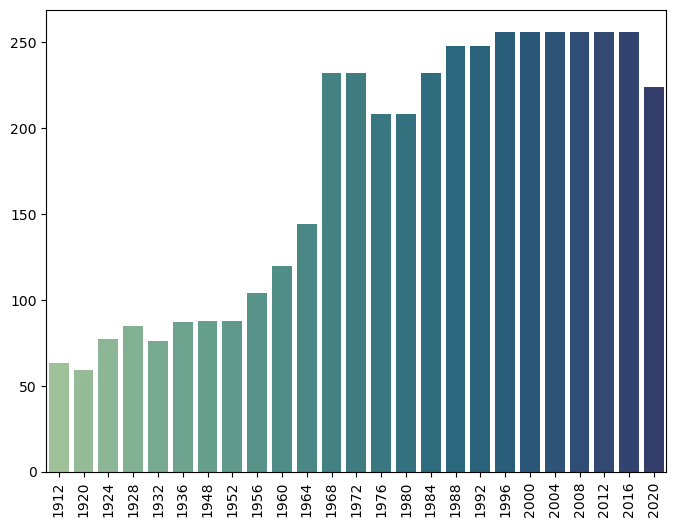

In [4]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts().values, palette = 'crest')
plt.xticks(rotation=90)
plt.show()

**As can be seen from the bar graph, although there are small decreases in between, an increase has been observed in the number of athletes participating in the Olympics over the years.**

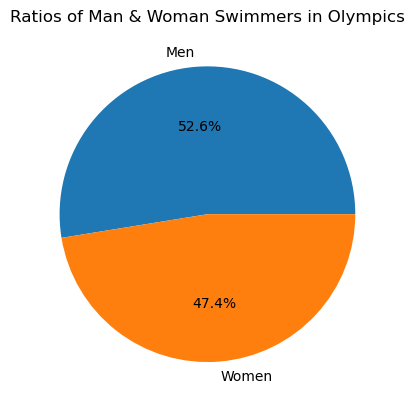

In [5]:
plt.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Ratios of Man & Woman Swimmers in Olympics')
plt.show()

**According to the result in the pie chart above, more than half of the swimmers participating in the Olympics are male athletes.**

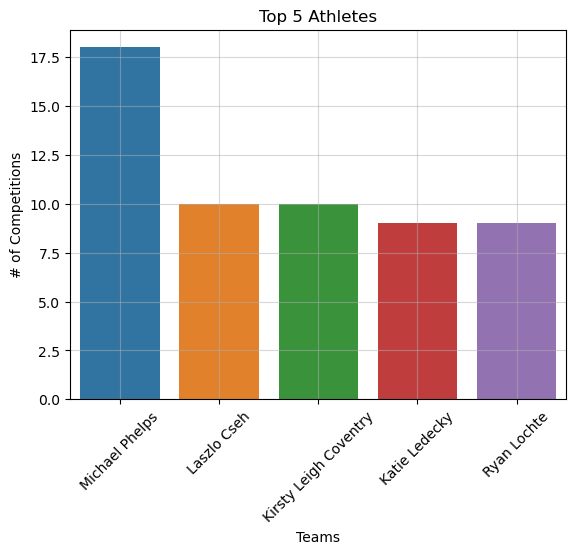

In [6]:
top5_athlete = df['Athlete'].value_counts()[:5]
sns.barplot(x=top5_athlete.index, y=top5_athlete.values)
plt.xticks(rotation=45)
plt.title('Top 5 Athletes')
plt.xlabel('Teams')
plt.ylabel('# of Competitions')
plt.grid(alpha=0.5)
plt.show()

**When the bar graph is examined, Michael Phelps is the athlete who competes the most in the Olympics with 18 swimming competitions he participated in.**

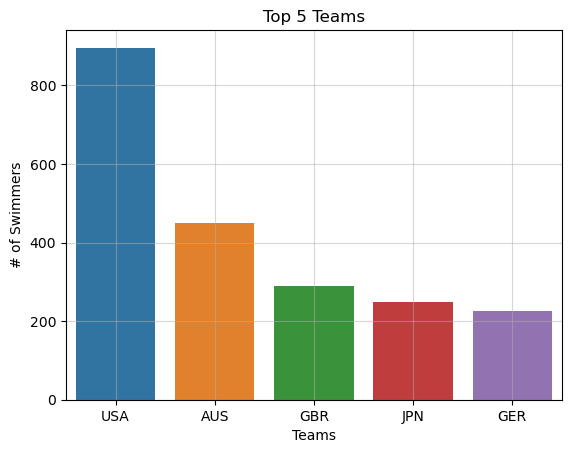

In [7]:
top5_team = df['Team'].value_counts()[:5]
sns.barplot(x=top5_team.index, y=top5_team.values)
plt.title('Top 5 Teams')
plt.xlabel('Teams')
plt.ylabel('# of Swimmers')
plt.grid(alpha=0.5)
plt.show()

**According to the results, with the more than 800 athletes, the USA team is the team that sent the most athletes to swim in the Olympics.**

In [8]:
new_df = df.copy()
new_df['Rank'].value_counts()

4    2582
3     566
2     548
1     534
0     101
5      28
Name: Rank, dtype: int64

In [9]:
result = ['DNF', 'Gold', 'Silver', 'Bronze', 'No Medal', 'No Data']
for i in range(0,6):
    new_df['Rank'].replace(i, result[i], inplace=True)
new_df['Rank'].value_counts()

No Medal    2582
Bronze       566
Silver       548
Gold         534
DNF          101
No Data       28
Name: Rank, dtype: int64

In [10]:
new_df = pd.get_dummies(new_df, columns=['Rank'])
new_df.head(3)

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank_Bronze,Rank_DNF,Rank_Gold,Rank_No Data,Rank_No Medal,Rank_Silver
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,0,0,1,0,0,0
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,0,0,0,0,0,1
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,1,0,0,0,0,0


In [11]:
new_df[["Team", "Rank_Gold", "Rank_Silver", "Rank_Bronze"]].groupby(["Team"], as_index=False).sum().sort_values(by="Rank_Gold", ascending=False)[:10]

,Team,Rank_Gold,Rank_Silver,Rank_Bronze
81,USA,240,171,138
3,AUS,61,67,70
30,GDR,30,24,21
35,HUN,25,19,19
43,JPN,24,29,31
51,NED,17,15,16
15,CHN,14,19,12
31,GER,13,30,40
79,URS,11,16,19
29,GBR,10,27,30


**When the medals received are analyzed and ranked according to the number of gold medals won, it is seen that the 5 most successful teams are USA, AUS, GDR, HUN and JPN, respectively.**

In [12]:
new_df[["Gender", "Rank_Gold", "Rank_Silver", "Rank_Bronze"]].groupby(["Gender"], as_index=False).sum().sort_values(by="Rank_Gold", ascending=False)

,Gender,Rank_Gold,Rank_Silver,Rank_Bronze
0,Men,278,290,291
1,Women,256,258,275
